<a href="https://colab.research.google.com/github/avneesh-nolkha/EVA5/blob/master/Session9/EVA5_Assignment9_with85accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR
from torchvision import transforms

In [ ]:
!pip install git+https://github.com/smitasasindran/eva5utils.git

  Cloning https://github.com/smitasasindran/eva5utils.git to /tmp/pip-req-build-fazbdam8
  Running command git clone -q https://github.com/smitasasindran/eva5utils.git /tmp/pip-req-build-fazbdam8
     |████████████████████████████████| 634kB 6.4MB/s 
  Created wheel for eva5utils: filename=eva5utils-0.1.0-cp36-none-any.whl size=12355 sha256=dbccda7ac903f4de7305bcfbfc6b34466c9055517b1dd91b4cc5abe311c12b3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-c7thx2rs/wheels/c6/bb/ac/e3952b213bfdb25cb23715782e1a6b4b4b5cb10e42a2b80aa9
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654021 sha256=3aa6f26b7e5b98a985a4fc87c2a94c4dbb8c9ba4d60f5388f6dcf6b6dc9233ba
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built eva5utils imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
from eva5utils.dataloaders import load_cifar10
from eva5utils.model import Model7, ResNet18
from eva5utils.transforms import model9_resnet_train_transforms, model9_resnet_test_transforms
from eva5utils.train import train_loop
from eva5utils.test import test_loop
from eva5utils.utils import plot_samples
from eva5utils.utils.helpers import show_model_summary, DEVICE, IS_CUDA, accuracy_per_class, show_gradcam

In [ ]:
# Constants, put in config
epochs = 25
cuda_batch_size=128
cpu_batch_size = 4
num_workers = 4


model = ResNet18()
show_model_summary(model.to(DEVICE), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [ ]:
(trainloader, testloader, classes) = load_cifar10(model9_resnet_train_transforms(), model9_resnet_test_transforms(), cuda_batch_size, cpu_batch_size, num_workers)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print(DEVICE)
torch.cuda.is_available()



cuda


True

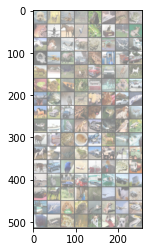

In [ ]:
plot_samples(trainloader)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=30, gamma=.1)
train_loop(epochs, trainloader, model, DEVICE, optimizer, criterion, scheduler)

[1,   391] loss: 778.734
[2,   391] loss: 546.834
[3,   391] loss: 443.724
[4,   391] loss: 355.829
[5,   391] loss: 300.815
[6,   391] loss: 254.792
[7,   391] loss: 219.081
[8,   391] loss: 189.715
[9,   391] loss: 166.576
[10,   391] loss: 147.862
[11,   391] loss: 130.585
[12,   391] loss: 114.937
[13,   391] loss: 101.872
[14,   391] loss: 89.215
[15,   391] loss: 78.882
[16,   391] loss: 69.866
[17,   391] loss: 62.567
[18,   391] loss: 54.720
[19,   391] loss: 49.123
[20,   391] loss: 42.175
[21,   391] loss: 40.717
[22,   391] loss: 34.207
[23,   391] loss: 29.487
[24,   391] loss: 27.534
[25,   391] loss: 24.175


In [ ]:
test_loop(testloader, model, DEVICE, criterion)
accuracy_per_class(model, classes, testloader, DEVICE)

Accuracy of the network on the 10000 test images: 85 %, Test loss: 2124.634893000126
Accuracy of plane : 92 %
Accuracy of   car : 92 %
Accuracy of  bird : 72 %
Accuracy of   cat : 62 %
Accuracy of  deer : 78 %
Accuracy of   dog : 82 %
Accuracy of  frog : 93 %
Accuracy of horse : 88 %
Accuracy of  ship : 88 %
Accuracy of truck : 86 %


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


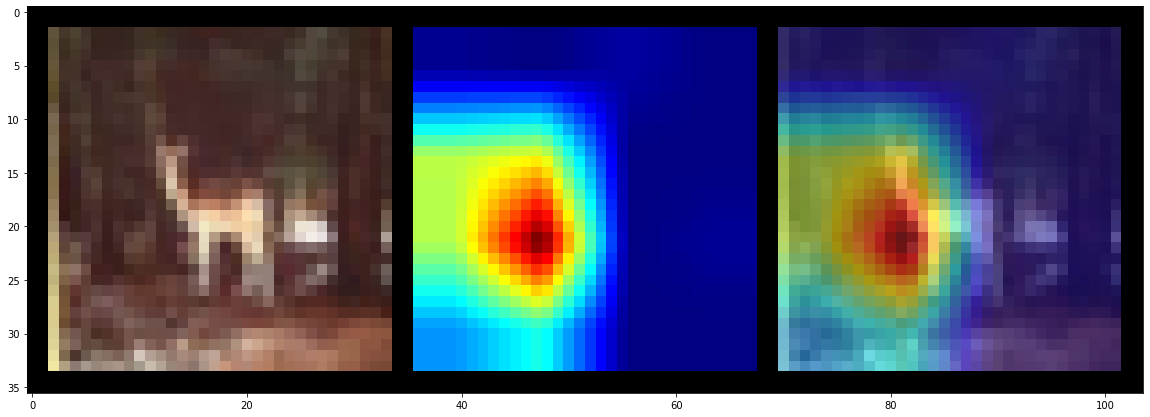

Prediction : deer, Actual : deer


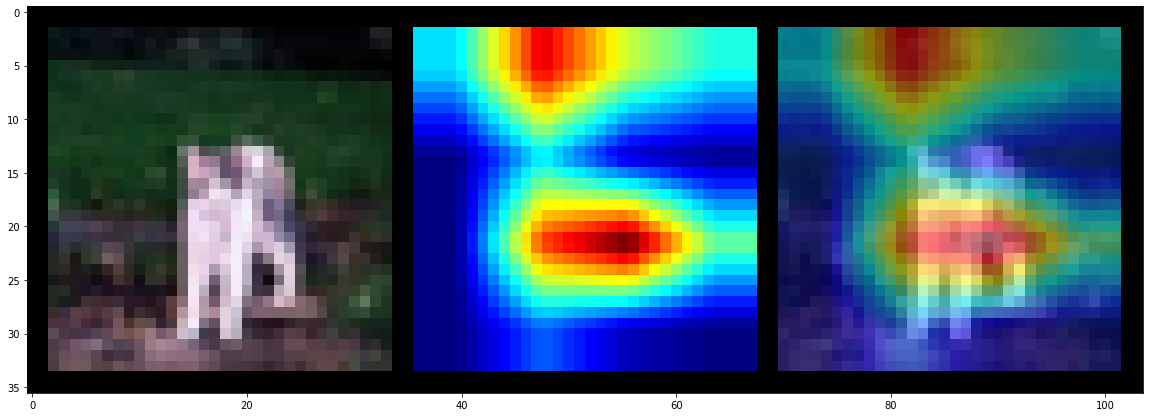

Prediction : cat, Actual : cat


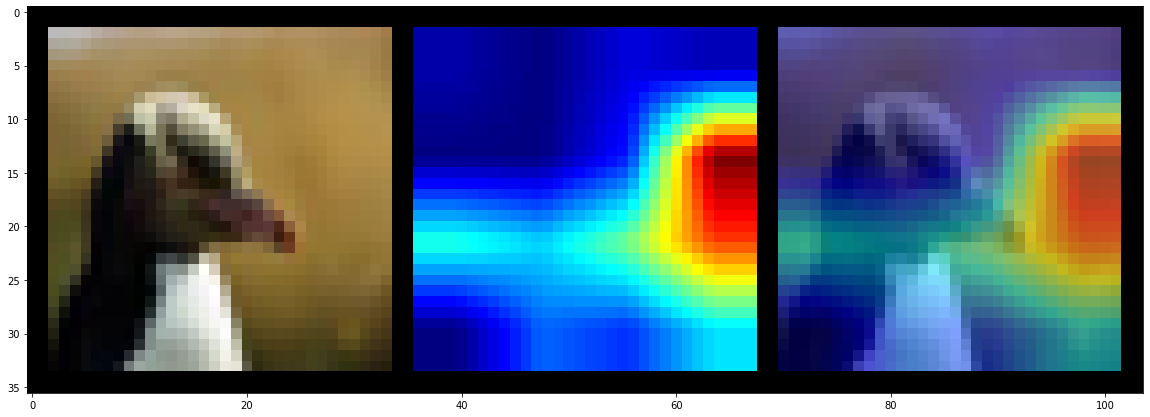

Prediction : bird, Actual : bird


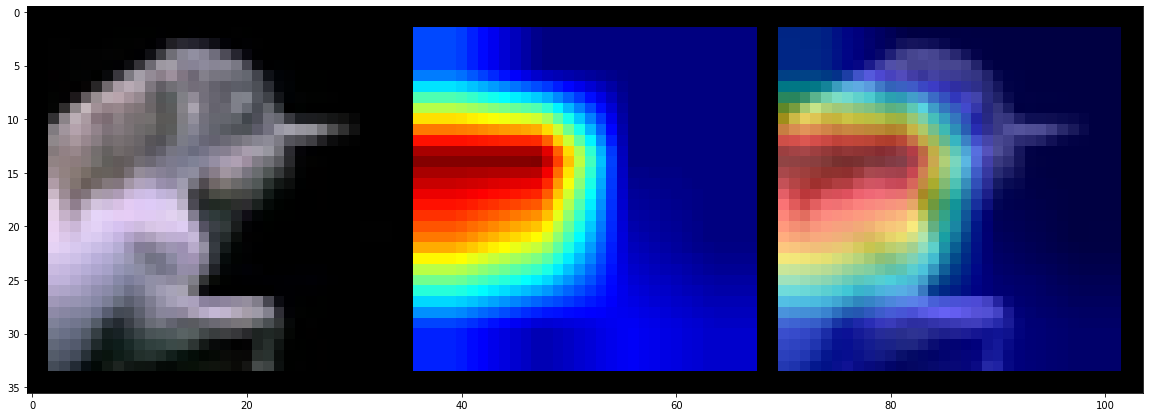

Prediction : cat, Actual : horse


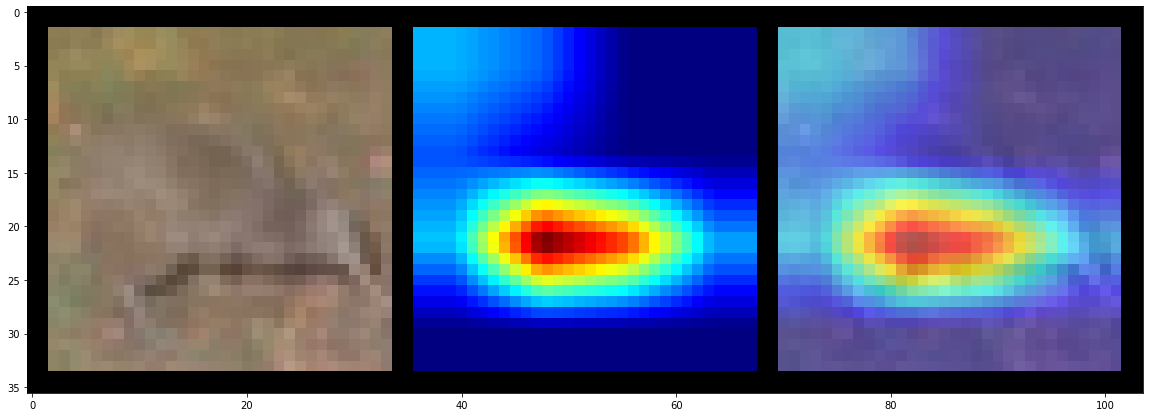

Prediction : bird, Actual : bird


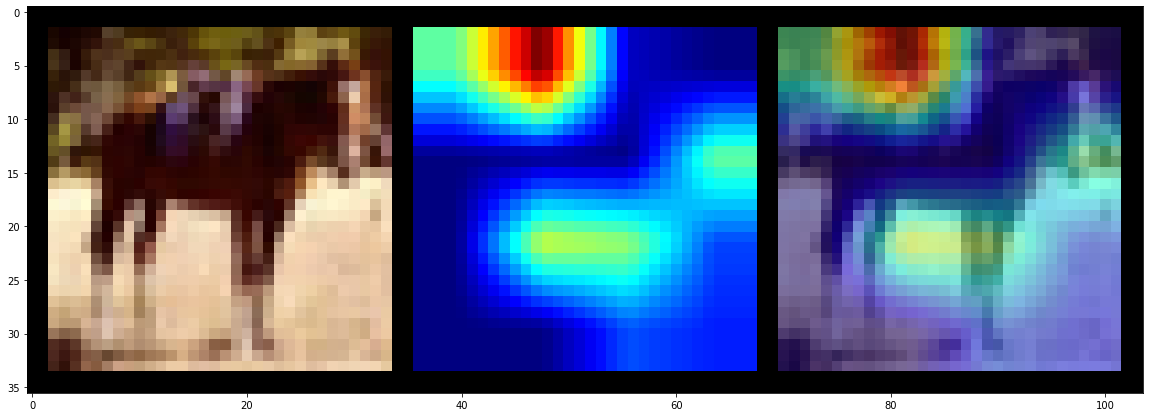

Prediction : horse, Actual : horse


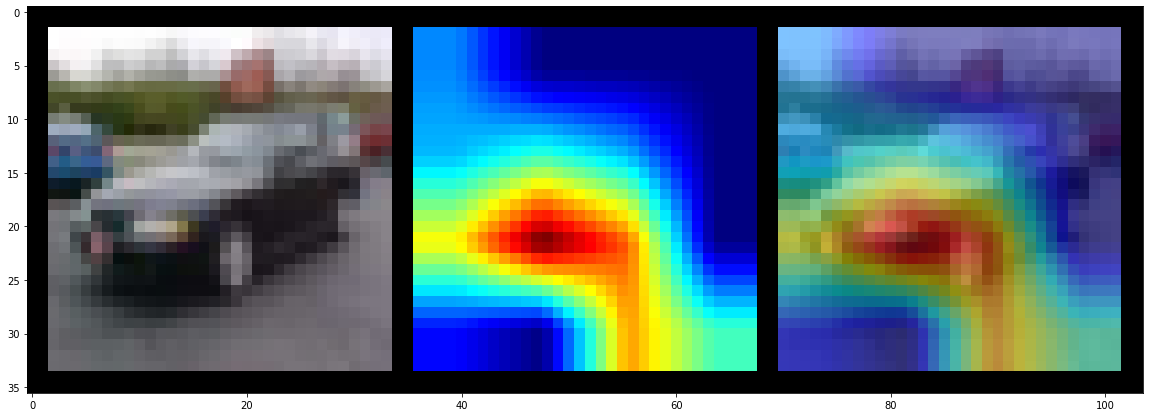

Prediction : car, Actual : car


In [ ]:
show_gradcam(model,'resnet','layer4',testloader,classes,7)